In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("./mlt-week-1/mnist_784.csv")
df['class'] = df['class'].apply(lambda x: int(x[2:-1]))
df

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [4]:
df_train = df.iloc[:60000]
df_test = df.iloc[60000:]

df_train.shape
df_test.shape

(60000, 785)

(10000, 785)

In [9]:
df_train_two = df_train[df_train['class'] == 2]
df_test_two = df_test[df_test['class'] == 2]

df_train_two.shape
df_test_two.shape

(5958, 785)

(1032, 785)

In [16]:
X_train = df_train_two.iloc[:100, :-1].values.T
X_test = df_test_two.iloc[:1, :-1].values.T

X_train.shape
X_test.shape

(784, 100)

(784, 1)

In [27]:
X_train_mean = X_train.mean(axis=1, keepdims=True)
X_train = X_train - X_train_mean
X_test = X_test - X_train_mean

In [28]:
n = X_train.shape[1]
C = X_train @ X_train.T
C.shape

(784, 784)

In [29]:
eigenvalues, eigenvectors = np.linalg.eigh(C)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

eigenvalues.shape
eigenvectors.shape

(784,)

(784, 784)

In [30]:
def find_k(threshold):
  return np.argmax(np.cumsum(eigenvalues) / sum(eigenvalues) >= threshold) + 1


for t in [.2, .5, .8, .95, 1]:
  print(f"threshold={t}, k={find_k(threshold=t)}")

threshold=0.2, k=2
threshold=0.5, k=6
threshold=0.8, k=22
threshold=0.95, k=53
threshold=1, k=99


np.int64(53)

np.float64(34.647313373837505)

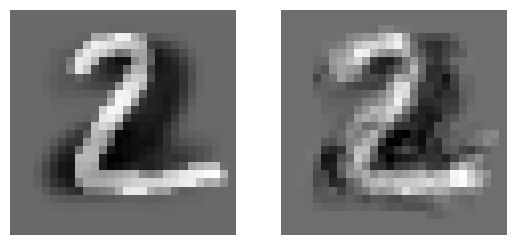

In [49]:
k = 784
k = find_k(.95)
k

W = eigenvectors[:, :k]
coefficients = X_test.T @ W
X_test_ = (coefficients @ W.T).T

np.sqrt(np.mean((X_test - X_test_)**2))

_ = plt.subplot(1, 2, 1)
_ = plt.imshow(X_test.reshape(28, 28), cmap="gray")
_ = plt.axis('off')

_ = plt.subplot(1, 2, 2)
_ = plt.imshow(X_test_.reshape(28, 28), cmap="gray")
_ = plt.axis('off')

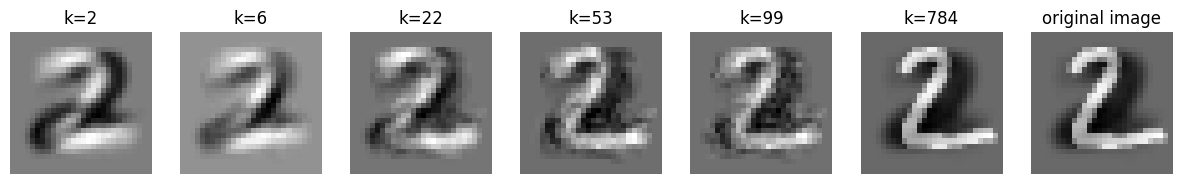

In [62]:
def plot_for_k(k_values):
  cols = len(k_values) + 1

  _ = plt.figure(figsize=(15, 3))
  for idx, k in enumerate(k_values, start=1):
    W = eigenvectors[:, :k]
    coefficients = X_test.T @ W
    X_test_ = (coefficients @ W.T).T

    np.sqrt(np.mean((X_test - X_test_)**2))

    _ = plt.subplot(1, cols, idx)
    _ = plt.imshow(X_test_.reshape(28, 28), cmap="gray")
    _ = plt.axis('off')
    _ = plt.title(f"k={k}")

  _ = plt.subplot(1, cols, cols)
  _ = plt.imshow(X_test.reshape(28, 28), cmap="gray")
  _ = plt.axis('off')
  _ = plt.title(f"original image")
  plt.show()


k_values = [find_k(t) for t in [.2, .5, .8, .95, 1]] + [784]
plot_for_k(k_values)